# Natural Language Processing Project

# Reddit Sentiment Analysis ( Wall Street Data Analysis)

Group Members - 

**Gaurang Sonkavde -  21070149023**


**Akhilesh Tawte - 21070149026**

In [4]:
!pip install text2emotion
!pip install raceplotly
!pip install nltk

Import Necessary Libraries

In [6]:
# To prevent the annoyning Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.cm.mako_r

import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
from raceplotly.plots import barplot

import nltk
nltk.download('words')

import re
from nltk import word_tokenize, corpus
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

english_words = set(corpus.words.words())

from IPython.core.display import HTML
HTML("""<style> 
            .output_png { display: table-cell; text-align: center; vertical-align: middle; } 
     </style> """)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Import Data

In [7]:
data = pd.read_csv(r'/content/reddit_wsb.csv')
data

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
32199,I know you guys don't give real advice but bew...,35,ldpdgd,https://www.reddit.com/r/wallstreetbets/commen...,46,1.612613e+09,This can't be legal...RH deactivated my accoun...,2021-02-06 13:59:03
32200,$CHGG (Cheating Chegg) Puts--A Decent Opportunity,26,ldpc2n,https://www.reddit.com/r/wallstreetbets/commen...,21,1.612613e+09,I got most of the answers for this DD from som...,2021-02-06 13:56:26
32201,Change of dialect. Will wsb speak with a new t...,5,ldpbzk,https://www.reddit.com/r/wallstreetbets/commen...,30,1.612613e+09,This really is a humorous place. I just read h...,2021-02-06 13:56:17
32202,The Karma farming has gotten out of hand,41,ldpbek,https://www.reddit.com/r/wallstreetbets/commen...,50,1.612613e+09,People need to move to GME specific subreddit ...,2021-02-06 13:55:12


Distribution of Title Length in Data (Reason why Titles are kept Short)

In [11]:
# What is the average length of the title
data['len']=data['title'].apply(lambda x : len(x.split(' ')))
px.histogram(data['len'],template='plotly_dark')

Post Distribution Volatile week in Wall Street and based on reaction

In [13]:
t=np.load('/content/another one.npy', allow_pickle=True)
data['overall text']=data.title+" "+data.body.astype("str")
data['Happy']=[dict(i)['Happy'] for i in t]
data['Angry']=[dict(i)['Angry'] for i in t]
data['Surprise']=[dict(i)['Surprise'] for i in t]
data['Sad']=[dict(i)['Sad'] for i in t]
data['Fear']=[dict(i)['Fear'] for i in t]
dominant=[]
for i in t:
    p=dict(i)
    Keymax = max(p, key=p.get)
    dominant.append(Keymax)
data['dominant emotion']=dominant
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
data['timestamp']=pd.to_datetime(data['timestamp'])
data['date']=data['timestamp'].dt.day
data['weekday']=data['timestamp'].dt.weekday
data['weekday']=data['weekday'].apply(lambda x: day_name[x])
data['hour']=data['timestamp'].dt.hour

In [16]:
px.histogram(data,x='weekday',color='weekday',template='plotly_dark')

As we can see that Friday has most Count , so lets see what was the reaction overtime from Friday to Wednesday

In [17]:
df=pd.DataFrame()
df['Emotion']=data['dominant emotion']
df['Day']=data['weekday']
df['Count']=[1]*len(df)
grouped_data=df.groupby(['Day','Emotion']).sum()
ind=np.array(list(grouped_data.index))
df2=pd.DataFrame()
df2['Day']=ind[:,0]
df2['Emotion']=ind[:,1]
df2['Count']=grouped_data.values
my_raceplot = barplot(df2,
                      item_column='Emotion',
                      value_column='Count',
                      time_column='Day')

my_raceplot.plot(title = 'Emotion in the sub reddit section',
                 item_label = 'Emotions',
                 value_label = 'Count (Total Count On That Day)',
                 frame_duration = 800)

Reaction of Traders with respect to Time on Friday (29-01-2021)

In [18]:
df=pd.DataFrame()
dn=data[data['weekday']=='Friday']
df['Emotion']=dn['dominant emotion']
df['Hour']=dn['hour']
df['Count']=[1]*len(df)
grouped_data=df.groupby(['Hour','Emotion']).sum()
ind=np.array(list(grouped_data.index))
df2=pd.DataFrame()
df2['Hour']=ind[:,0]
df2['Emotion']=ind[:,1]
df2['Count']=grouped_data.values
df2['Hour']=df2['Hour'].apply(lambda x : int(x))
df2.sort_values('Hour',inplace=True)
my_raceplot = barplot(df2,
                      item_column='Emotion',
                      value_column='Count',
                      time_column='Hour')

my_raceplot.plot(title = 'Emotion in the sub reddit section on Friday as the day continued',
                 item_label = 'Emotions',
                 value_label = 'Count (Total Count On That Day)',
                 frame_duration = 800)

What was the Emotion  based on Number of Comments

In [19]:
rel=data.groupby('dominant emotion').sum()
px.bar(x=rel.index,y=rel['comms_num'].values,color=rel.index,template='plotly_dark',labels={'x':'Emotions','y':'Number of comments'})

This states that The most Comment relates to emotion of Happiness

**Relation between Emotion and Score**

In [20]:
rel=data.groupby('dominant emotion').mean()
px.bar(x=rel.index,y=rel['score'].values,color=rel.index,template='plotly_dark',labels={'x':'Emotions','y':'Mean of score'})

**Word Cloud ( Which Words are repeated most of Times)**

# Focous more on 'title' and 'body' column

Preprocess the data i.e remove Handlers , URL's, Special Characters , Single Characters and Extra Spaces

In [23]:
reddit_title = data['title'].dropna()
reddit_body = data['body'].dropna()


def clean_text_date(text):
    text = text.lower()

    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+','',text)

    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "",text)

    # Remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

    
# Text Preprocessing
reddit_title = reddit_title.apply(lambda x : clean_text_date(x))
reddit_body = reddit_body.apply(lambda x : clean_text_date(x))

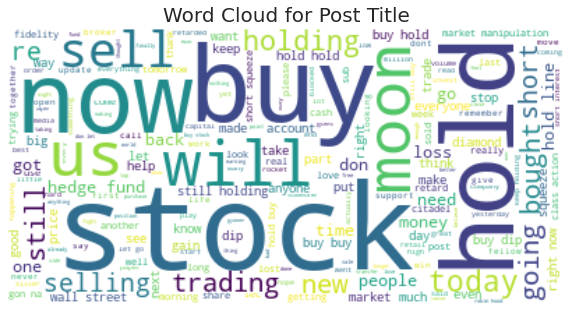

In [24]:
word_tokens = [word_tokenize(text) for text in reddit_title]

word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "
        
# Updating some of the Words into Stopwords 
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords).generate(word_cloud_string)
plt.figure(figsize=(10,20))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Title", fontsize=20)
plt.axis('off')
plt.show()

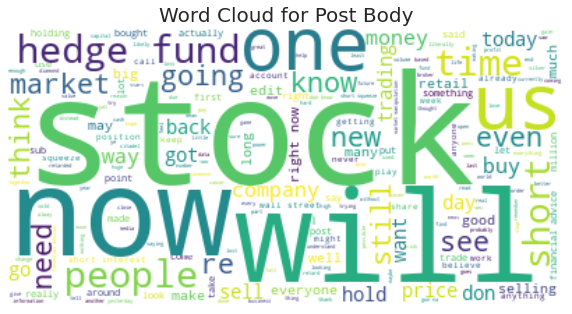

In [25]:
word_tokens = [word_tokenize(text) for text in reddit_body]

word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "
        
# Updating some of the Words into Stopwords 
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords).generate(word_cloud_string)
plt.figure(figsize=(10,20))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Body", fontsize=20)
plt.axis('off')
plt.show()

Sentiment Analysis using SentimentIntensityAnalyzer from nltk.sentiment

1) Calling get_sentiment() on each Title and Body

2) Creating a new Column called 'Sentiment' and storing the respective sentiment

3) Using the Sentiment column to plot various graphs.

In [27]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 10.7 MB/s 


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
def get_sentiment(sia, text):
    if sia.polarity_scores(text)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(text)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

sia = SentimentIntensityAnalyzer()    
    
reddit_title_df = reddit_title.to_frame(name='Title')
reddit_title_df['Sentiment'] = reddit_title_df['Title'].apply(lambda x : get_sentiment(sia, x))

reddit_body_df = reddit_body.to_frame(name='Body')
reddit_body_df['Sentiment'] = reddit_body_df['Body'].apply(lambda x : get_sentiment(sia, x))

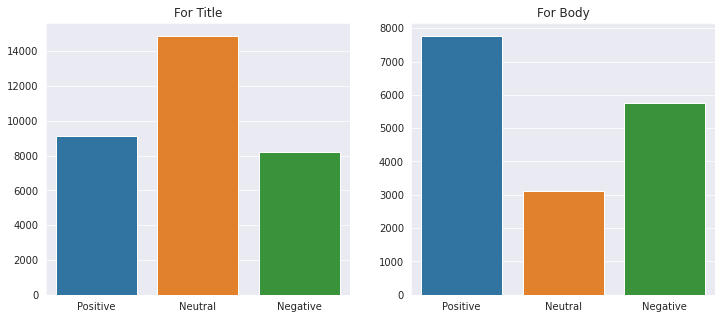

In [30]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))

order = ['Positive', 'Neutral', 'Negative']

xs = reddit_title_df['Sentiment'].value_counts().index
ys = reddit_title_df['Sentiment'].value_counts().values
sns.barplot(x=xs, y=ys, order=order, ax=axis1)

xs = reddit_body_df['Sentiment'].value_counts().index
ys = reddit_body_df['Sentiment'].value_counts().values
sns.barplot(x=xs, y=ys, order=order, ax=axis2)

axis1.set_title("For Title")
axis2.set_title("For Body")

plt.show()

Different Sentiment Word Count

Title

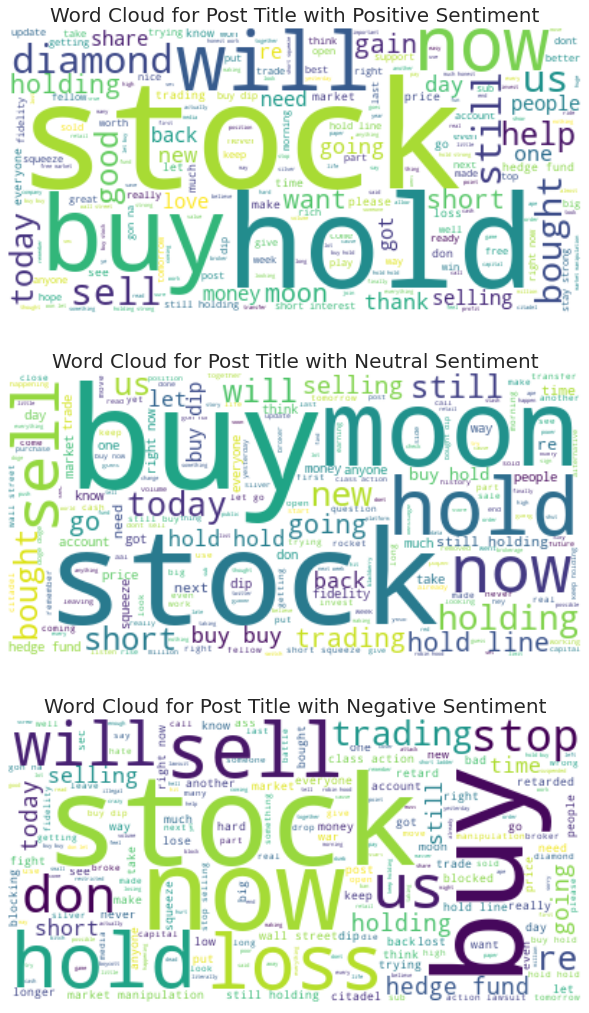

In [32]:
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(12,18))

axes = [axis1, axis2, axis3]
sentiments = ['Positive', 'Neutral', 'Negative']

for i in range(3):
    word_tokens = [word_tokenize(text) for text in reddit_title_df[reddit_title_df['Sentiment'] == sentiments[i]]['Title']]
    
    word_cloud_string = ""
    
    for word_list in word_tokens:
        for word in word_list:
            if word.lower() in english_words:
                word_cloud_string += word + " "
    
    description_stopwords = set(STOPWORDS)

    my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords).generate(word_cloud_string)
    axes[i].imshow(my_word_cloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud for Post Title with {sentiments[i]} Sentiment", fontsize=20)
    axes[i].axis('off')


plt.show()

Body

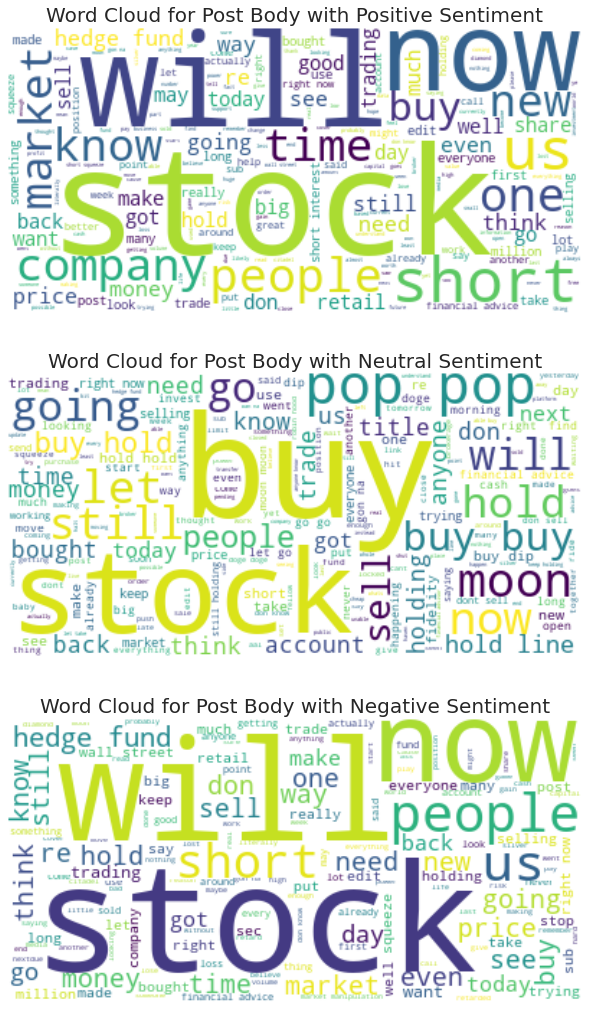

In [33]:
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(12,18))

axes = [axis1, axis2, axis3]
sentiments = ['Positive', 'Neutral', 'Negative']

for i in range(3):
    word_tokens = [word_tokenize(text) for text in reddit_body_df[reddit_body_df['Sentiment'] == sentiments[i]]['Body']]
    
    word_cloud_string = ""
    
    for word_list in word_tokens:
        for word in word_list:
            if word.lower() in english_words:
                word_cloud_string += word + " "
    
    description_stopwords = set(STOPWORDS)

    my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords).generate(word_cloud_string)
    axes[i].imshow(my_word_cloud, interpolation='bilinear')
    axes[i].set_title(f"Word Cloud for Post Body with {sentiments[i]} Sentiment", fontsize=20)
    axes[i].axis('off')


plt.show()

Word Cloud for Different Emotions

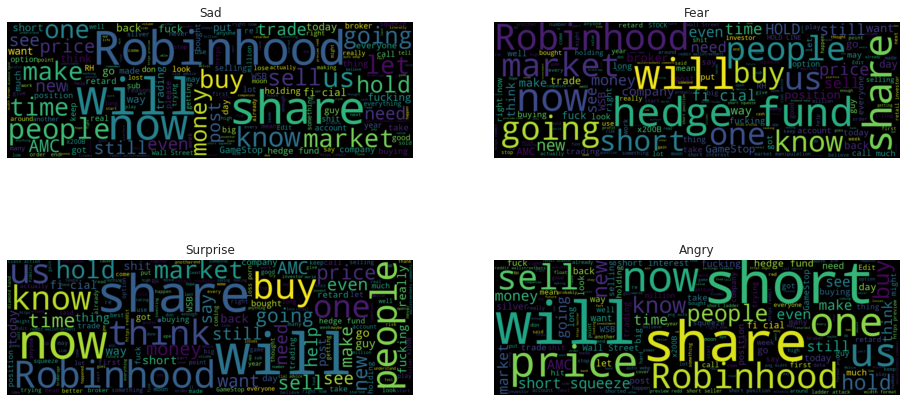

In [21]:
# Wordplot for being angry,sad,emotional
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry']:
    dd=data[data['dominant emotion']==i]
    text=" ".join(dd['overall text'])
    text=text.replace("stock",' ')
    text=text.replace("GME"," ")
    text=text.replace("nan",' ')
    wordcloud = WordCloud(width=1500, height=500).generate(text)

    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0

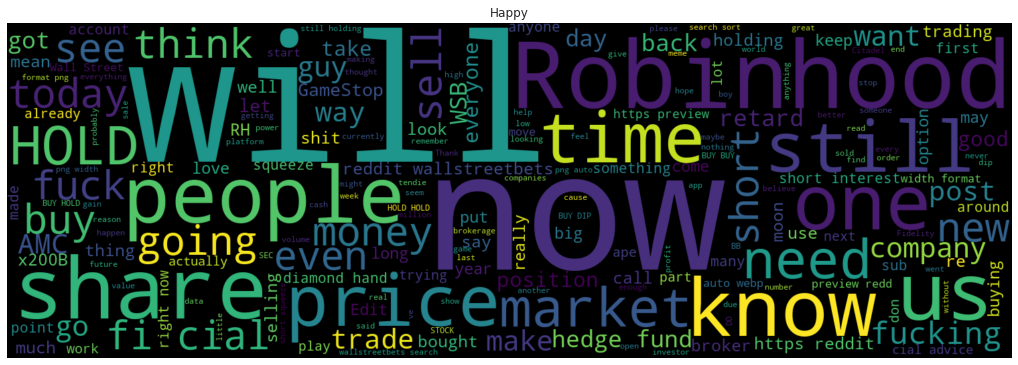

In [22]:
dd=data[data['dominant emotion']=='Happy']
text=" ".join(dd['overall text'])
text=text.replace("stock",' ')
text=text.replace("GME"," ")
text=text.replace("nan",' ')
wordcloud = WordCloud(width=1500, height=500).generate(text)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear');
plt.title('Happy') ;
plt.axis("off") ;